In [35]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
#read the csv file
stocks = pd.read_csv("data/Final_Collective_Dataset.csv")
stocks.head()

,Date,UAL_Close,UAL_Volume,UAL_Open,UAL_High,UAL_Low,DAL_Close,DAL_Volume,DAL_Open,DAL_High,...,LUV_High,LUV_Low,SAVE_Close,SAVE_Volume,SAVE_Open,SAVE_High,SAVE_Low,Year,Month,Day
0,2020-12-31,43.25,12683980.0,44.410,44.5617,43.11,40.21,8705736.0,40.30,40.7400,...,46.78,45.680,24.45,3548551.0,24.70,24.8914,24.2100,2020,12,31
1,2020-12-30,44.65,9473270.0,43.635,44.7600,43.46,40.56,8504632.0,40.00,40.9050,...,46.93,46.125,24.87,3427572.0,24.62,25.3400,24.5600,2020,12,30
2,2020-12-29,43.74,9927674.0,44.450,44.6489,43.55,40.03,8142801.0,40.84,40.8400,...,46.77,45.970,24.68,3917613.0,25.42,25.5700,24.5200,2020,12,29
3,2020-12-28,43.92,13693200.0,44.035,44.6250,43.75,40.15,10654380.0,40.27,40.7758,...,47.17,46.110,25.07,4295602.0,24.96,25.4700,24.6202,2020,12,28
4,2020-12-24,43.26,7230607.0,44.400,44.4165,43.01,39.73,5176408.0,40.42,40.4400,...,47.09,45.810,24.42,2618194.0,24.79,24.8300,24.0540,2020,12,24


In [37]:
#determine the shape of the data
print("training days =", stocks.shape)

training days = (756, 34)


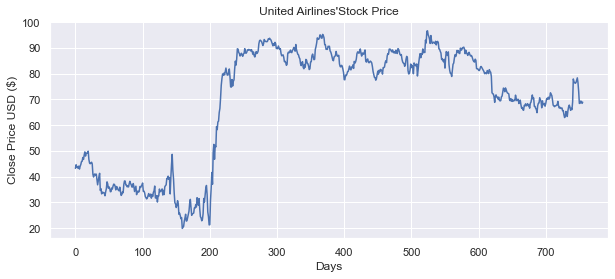

<Figure size 432x288 with 0 Axes>

In [56]:
#creating initial plot of United Airlines Closing prices as of Dec 31, 2020
sns.set()
plt.figure(figsize=(10, 4))

#create labels
plt.title("United Airlines'Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(stocks["UAL_Close"])

#display chart
plt.show()

#save to png
plt.savefig("images/originalclose.png")

In [40]:
#pulling the array of close prices
close = stocks[["UAL_Close"]]
close.head()

,UAL_Close
0,43.25
1,44.65
2,43.74
3,43.92
4,43.26


In [42]:
#creating a variable for the number of future days predicted
futureDays = 65

In [43]:
#creating a new column to hold the predicted values of close prices
close["Prediction"] = stocks[["UAL_Close"]].shift(-futureDays)
print(close.head())
print(close.tail())

   UAL_Close  Prediction
0      43.25       34.51
1      44.65       35.94
2      43.74       34.20
3      43.92       32.74
4      43.26       33.08
     UAL_Close  Prediction
751      68.51         NaN
752      69.36         NaN
753      69.26         NaN
754      68.49         NaN
755      68.94         NaN


<ipython-input-43-54dc9c3dd306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close["Prediction"] = stocks[["UAL_Close"]].shift(-futureDays)


In [44]:
#creating an array and removing the last rows
X = np.array(close.drop(["Prediction"], 1))[:-futureDays]
print(X)

[[43.25 ]
 [44.65 ]
 [43.74 ]
 [43.92 ]
 [43.26 ]
 [44.11 ]
 [42.97 ]
 [44.055]
 [44.74 ]
 [45.88 ]
 [46.   ]
 [47.46 ]
 [46.72 ]
 [48.36 ]
 [49.64 ]
 [48.02 ]
 [49.04 ]
 [49.2  ]
 [49.24 ]
 [49.91 ]
 [46.73 ]
 [45.32 ]
 [45.05 ]
 [45.3  ]
 [45.64 ]
 [44.96 ]
 [40.93 ]
 [39.9  ]
 [40.94 ]
 [41.05 ]
 [40.6  ]
 [41.   ]
 [38.99 ]
 [36.85 ]
 [38.51 ]
 [40.05 ]
 [41.32 ]
 [34.68 ]
 [35.35 ]
 [33.34 ]
 [34.02 ]
 [33.78 ]
 [33.86 ]
 [33.57 ]
 [32.6  ]
 [34.17 ]
 [35.34 ]
 [38.01 ]
 [37.24 ]
 [35.54 ]
 [36.06 ]
 [35.5  ]
 [34.16 ]
 [34.25 ]
 [35.61 ]
 [35.26 ]
 [36.38 ]
 [37.12 ]
 [37.   ]
 [36.38 ]
 [34.88 ]
 [36.2  ]
 [36.01 ]
 [35.18 ]
 [34.75 ]
 [34.51 ]
 [35.94 ]
 [34.2  ]
 [32.74 ]
 [33.08 ]
 [34.07 ]
 [33.79 ]
 [36.97 ]
 [38.355]
 [38.3  ]
 [36.8  ]
 [36.74 ]
 [36.07 ]
 [36.45 ]
 [36.03 ]
 [37.28 ]
 [38.21 ]
 [37.4  ]
 [36.89 ]
 [36.01 ]
 [36.   ]
 [37.34 ]
 [36.22 ]
 [34.25 ]
 [35.22 ]
 [36.32 ]
 [33.04 ]
 [34.05 ]
 [34.44 ]
 [33.98 ]
 [34.4  ]
 [36.18 ]
 [35.81 ]
 [36.4  ]
 [36.83 ]


In [45]:
#creating an array for the target dataset and removing the last rows
y = np.array(close["Prediction"])[:-futureDays]
print(y)

[34.51  35.94  34.2   32.74  33.08  34.07  33.79  36.97  38.355 38.3
 36.8   36.74  36.07  36.45  36.03  37.28  38.21  37.4   36.89  36.01
 36.    37.34  36.22  34.25  35.22  36.32  33.04  34.05  34.44  33.98
 34.4   36.18  35.81  36.4   36.83  37.54  34.33  34.4   33.73  32.29
 31.87  31.38  31.74  32.57  33.46  32.42  32.88  33.23  31.67  33.07
 32.33  33.92  34.49  36.37  31.74  31.76  32.67  30.17  32.53  32.55
 35.21  34.14  34.45  34.61  35.27  32.89  34.69  33.07  36.08  36.54
 36.84  39.34  39.25  40.21  39.    39.66  33.32  39.72  44.64  48.69
 42.405 39.1   33.65  29.91  29.46  28.04  28.89  30.69  29.54  25.4
 25.84  24.91  23.68  24.13  19.92  20.3   20.71  22.76  23.97  25.42
 22.75  22.91  24.12  25.26  26.62  29.58  31.21  27.84  25.    25.56
 25.72  25.88  27.88  27.79  29.08  28.21  31.86  30.9   28.91  31.5
 27.51  24.48  24.02  22.885 23.42  25.65  31.55  30.16  32.84  35.55
 36.6   33.    26.25  24.5   21.28  21.38  30.67  35.47  41.64  37.08
 49.34  52.56  46.78  5

In [46]:
#splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [47]:
#creating a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [48]:
#creating a Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)

In [49]:
#pulling the last rows of the predictive dataset
futureX = close.drop(["Prediction"], 1)[:-futureDays]
futureX = futureX.tail(futureDays)
futureX = np.array(futureX)
print(futureX)

[[71.79]
 [70.96]
 [70.92]
 [70.16]
 [70.92]
 [69.73]
 [69.44]
 [69.57]
 [71.02]
 [71.33]
 [72.94]
 [74.42]
 [74.07]
 [73.  ]
 [74.49]
 [73.89]
 [73.02]
 [72.5 ]
 [72.39]
 [72.15]
 [69.99]
 [69.54]
 [70.36]
 [69.32]
 [69.98]
 [69.25]
 [69.59]
 [69.8 ]
 [69.52]
 [71.68]
 [70.47]
 [69.54]
 [69.99]
 [70.07]
 [68.42]
 [69.49]
 [69.74]
 [68.03]
 [66.64]
 [66.92]
 [66.02]
 [65.8 ]
 [67.72]
 [67.52]
 [68.32]
 [67.52]
 [67.92]
 [68.38]
 [67.54]
 [67.86]
 [66.62]
 [68.51]
 [68.95]
 [70.33]
 [71.75]
 [70.23]
 [70.58]
 [67.34]
 [67.31]
 [66.54]
 [66.1 ]
 [64.87]
 [67.59]
 [68.52]
 [68.63]]


In [50]:
#predicting using the decision tree model
treePrediction = tree.predict(futureX)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [76.58  69.99  69.47  66.77  69.47  67.91  68.18  68.48  67.39  68.45
 69.94  70.14  70.13  70.88  70.14  70.74  70.88  72.    72.    69.87
 67.165 67.055 67.21  67.79  67.165 67.79  68.48  69.26  67.57  66.7
 67.    67.055 67.165 67.165 65.68  67.57  64.14  62.98  63.37  65.36
 63.95  63.95  65.68  67.08  66.56  67.08  65.78  66.56  66.08  65.78
 63.37  68.49  76.5   76.3   76.58  66.77  78.4   73.08  73.08  68.48
 68.51  90.97  69.26  68.49  68.94 ]


In [51]:
#predicting using the linear regression model
linearPrediction = linear.predict(futureX)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [73.32320596 72.81755993 72.79319145 72.33019027 72.79319145 72.06822907
 71.89155757 71.97075514 72.85411266 73.0429684  74.02379985 74.92543373
 74.7122095  74.06035257 74.96807857 74.60255132 74.07253682 73.75574653
 73.68873321 73.54252231 72.22662422 71.95247878 72.45203268 71.81845212
 72.22053209 71.77580728 71.98293938 72.11087392 71.94029454 73.25619263
 72.51904601 71.95247878 72.22662422 72.27536118 71.27016125 71.92201818
 72.0743212  71.03256854 70.18576375 70.35634313 69.80805226 69.6740256
 70.8437128  70.72187038 71.20924004 70.72187038 70.96555521 71.24579277
 70.73405462 70.92900249 70.17357951 71.32499034 71.59304365 72.43375632
 73.29883747 72.37283511 72.58605934 70.61221221 70.59393584 70.12484254
 69.85678923 69.10745837 70.76451523 71.33108246 71.39809579]


<ipython-input-57-67acde835282>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


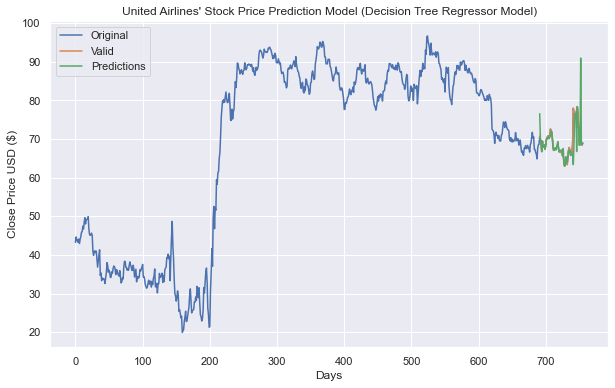

<Figure size 432x288 with 0 Axes>

In [57]:
#plotting the decision tree model predictions
predictions = treePrediction
valid = close[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))

#create labels
plt.title("United Airlines' Stock Price Prediction Model (Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(close["UAL_Close"])
plt.plot(valid[["UAL_Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])

#display the chart
plt.show()

#save to png
plt.savefig("images/decisiontree.png")

<ipython-input-58-4b15984bfa0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


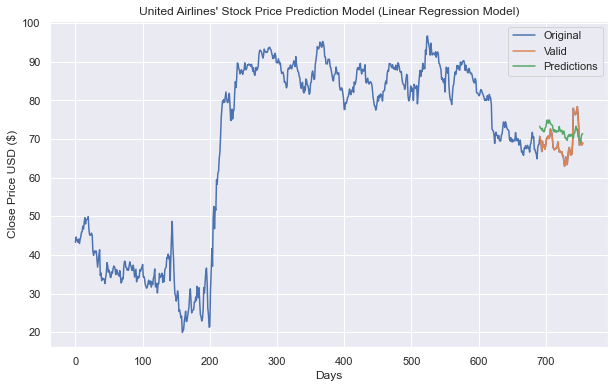

<Figure size 432x288 with 0 Axes>

In [58]:
#plotting the linear regression model predictions
predictions = linearPrediction
valid = close[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))

#create labels
plt.title("United Airlines' Stock Price Prediction Model (Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(close["UAL_Close"])
plt.plot(valid[["UAL_Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])

#display chart
plt.show()

#save to png
plt.savefig("images/linearregression.png")